# Introduction

In this notebook, I will apply classification algorithms with scikit-learn library. Firstly, EDA(Exploratory Data Analysis) will be applied to dataset. Then, different algorithms will classify dataset.

[0. EDA(Exploratory Data Analysis)](#1)

[1. K-Nearest Neighbor Algorithm](#2)

[2. Support Vector Machine(SVM)](#3)

[3. Naive-Bayes Classification](#4)

[4. Decision Tree Classification](#5)

[5. Random Forest Classification](#6)

[6.  Conclusion](#7)

[7.  References](#8)


<a id="1"></a> <br>
## EDA (Exploratory Data Analysis)

In [1]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('breastCancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Clear the noisy attributes
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [4]:
M = data[data.diagnosis=='M']
B = data[data.diagnosis=='B']

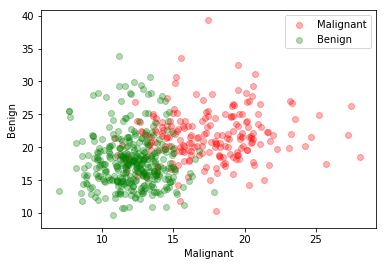

In [5]:
plt.scatter(M.radius_mean,M.texture_mean,color='red',label='Malignant',alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color='green',label='Benign',alpha=0.3)
plt.xlabel('Malignant')
plt.ylabel('Benign')
plt.legend()
plt.show()

In [6]:
# Change M and B values to 0 and 1
# Prepare x and y values for KNN algorithm
data.diagnosis= [1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [7]:
# Normalization
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [8]:
# Train-Test Split for Learning
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

<a id="2"></a><br>
## KNN(K-Nearest Neighbor) Classification

![KNN](https://www.kdnuggets.com/wp-content/uploads/knn2.jpg)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) #k=3
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} nn score: {}".format(3,knn.score(x_test,y_test)))

3 nn score: 0.9532163742690059


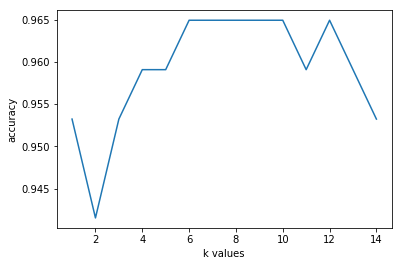

In [10]:
# Hyperparameter Tuning
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

<a id="3"></a><br>
## SUPPORT VECTOR MACHINE(SVM)

![](http://www.saedsayad.com/images/SVM_2.png)

I will not explain how SVM algorithm works. However, I found a great page for understand SVM algorithm. 
So you can look detailed information about SVM in there : [Support Vector Machine](http://www.saedsayad.com/support_vector_machine.htm)

**Note : Our x,y, train-test split(x_data,y_data) values are prepared from the previous algorithm**

In [12]:
from sklearn.svm import SVC
svm = SVC(random_state=1) # Return the same value every time
svm.fit(x_train,y_train)

# test
print("primy accuracy of SVM algorithm : ",svm.score(x_test,y_test))

primy accuracy of SVM algorithm :  0.9532163742690059


C:\Users\ferha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<a id="4"></a><br>
## Naive-Bayes Classification

Here is the another probabilstic approach for machine learning. You can look the Bayes Theorem from this page.
![Naive-Bayes](http://www.saedsayad.com/images/Bayes_rule.png)
[Naive-Bayes Classification](http://www.saedsayad.com/naive_bayesian.htm)

**Note : Our x,y, train-test split(x_data,y_data) values prepared from the previous algorithm**

In [13]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

#test
print("Accuracy of Naive-Bayes Algorithm",nb.score(x_test,y_test))

Accuracy of Naive-Bayes Algorithm 0.935672514619883


<a id="5"></a><br>
## Decision Tree Classification

<img src="https://tr.akinator.com/bundles/elokencesite/images/akinator.png?v95" alt="drawing" height="300" width="300"/>

Have you ever played Akinator Game? It is a great example of decision trees. If you haven't yet, let me explain. The goal of the game is predict a famous character, based of bunch of questions which asked to us. After the each answer, questions are getting more relevant to famous person which is in our mind. Finally, akinator shows his predict. Mostly, he justifies about the prediction.

Decision tree algorithm works behind the akinator. There are splits which decides to person to based on the answers. For example if we are looking for a person which is blonde then it redirects the future predictions to "blonde" people. "Blonde" input is given by the user as an answer for a question.

If you want to play the game, the link is below.

https://en.akinator.com/

![](https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png?w=616&h=342)
Source : https://annalyzin.files.wordpress.com/2016/07/decision-trees-titanic-tutorial.png?w=616&h=342

You can see the splits. It can be more than two splits. In this example, we have a binary tree. The bottom nodes known as "leaf". These are our predictions. The top node is "root" node. In a nutshell, let's start the code.

* EDA and Normalization have already done in the previous sections. 
* Train-Test split is obtained in the previous sections. But I want to change percentage of test split to 15%

Let's start at the algorithm.

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
# Accuracy
print("Accuracy of Decision Tree Algorithm",dt.score(x_test,y_test))

Accuracy of Decision Tree Algorithm 0.9186046511627907


<a id="6"></a><br>
# Random Forest Classification

* The random forest is a "ensemble learning" algorithm. So, it includes more than one classification algorithm. The "forest" name comes from to our trees. In a nutshell, random forest classification is includes 'n' trees in itself. 

* While we make predictions, different results(classes) can occur. In order to reduce our prediction to a singe class, we will use "Majority Voting". It is simple, which count of class is bigger than to other it will be final result.

* Estimator = Number of trees for our random forest classification model

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=1) # Number of tree = 100
rf.fit(x_train,y_train)
print("Accuracy of Random Forest Algorithm",rf.score(x_test,y_test))

Accuracy of Random Forest Algorithm 0.9534883720930233


We can see that, accuracy is increased. However, we can't be sure about the number of estimators. In order to choose best number of estimators:

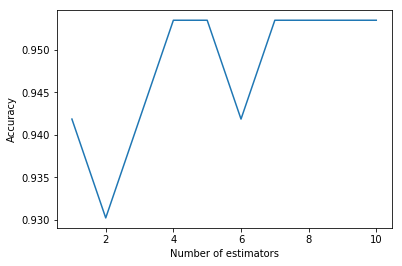

In [16]:
accuracy_list=[]
for i in range(1,11,1):
    rf = RandomForestClassifier(n_estimators=i,random_state=1) # Number of tree = 100
    rf.fit(x_train,y_train)
    accuracy_list.append(rf.score(x_test,y_test))
    #print("Accuracy of Random Forest Algorithm for {} trees: {}".format(i,rf.score(x_test,y_test)))
plt.plot(range(1,11),accuracy_list)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

We can see that, optimum number of estimators is 4. There is no need to 100 trees. Hence, we can obtain same result with less trees.

<a id="7"></a><br>
## Conclusion

* You have seen which algorithm is better. Of course **none of them**. All algorithms have trade-offs. You should pick your algorithm for your scenario. 

* Do not forget tuning **hyperparameters** for the better results.


<a id="8"></a><br>
## References

https://www.kaggle.com/kanncaa1/machine-learning-tutorial-for-beginners

http://www.saedsayad.com/

